In [1]:
from skimage import filters
import cv2
import numpy as np
import matplotlib.pyplot as plt

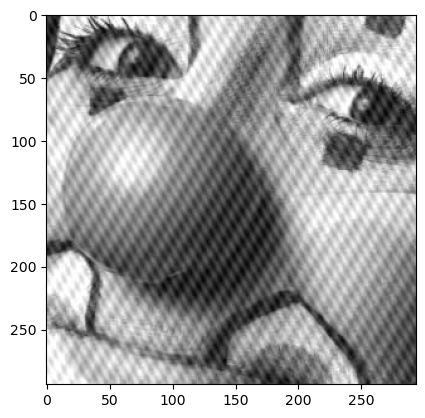

In [3]:
img = cv2.imread('./image/ClownOrig.jpg',0)
plt.imshow(img,cmap='grey')
plt.show()

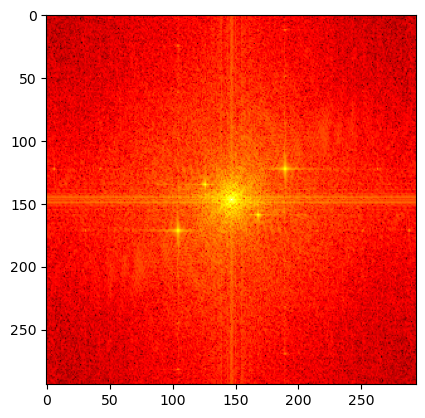

In [4]:
F = np.fft.fft2(img)
Fshift = np.fft.fftshift(F)

plt.imshow(np.log1p(np.abs(Fshift)),cmap='hot')
# plt.axis('off')
plt.show()

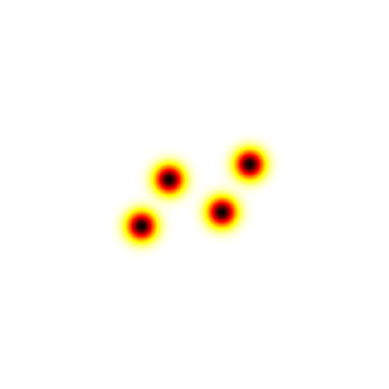

In [10]:
N = Fshift.shape[0]
x, y = np.meshgrid(np.arange(N), np.arange(N))

a1 = 0.008
a2 = 0.008

NF1 = 1 - np.exp(-a1*(x-190)**2 - a2*(y-123)**2) # Gaussian
NF2 = 1 - np.exp(-a1*(x-104)**2 - a2*(y-172)**2) # Gaussian
NF3 = 1 - np.exp(-a1*(x-126)**2 - a2*(y-135)**2) # Gaussian
NF4 = 1 - np.exp(-a1*(x-168)**2 - a2*(y-161)**2) # Gaussian

H = NF1*NF2*NF3*NF4

plt.imshow(H,cmap='hot')
plt.axis(False)
plt.show()

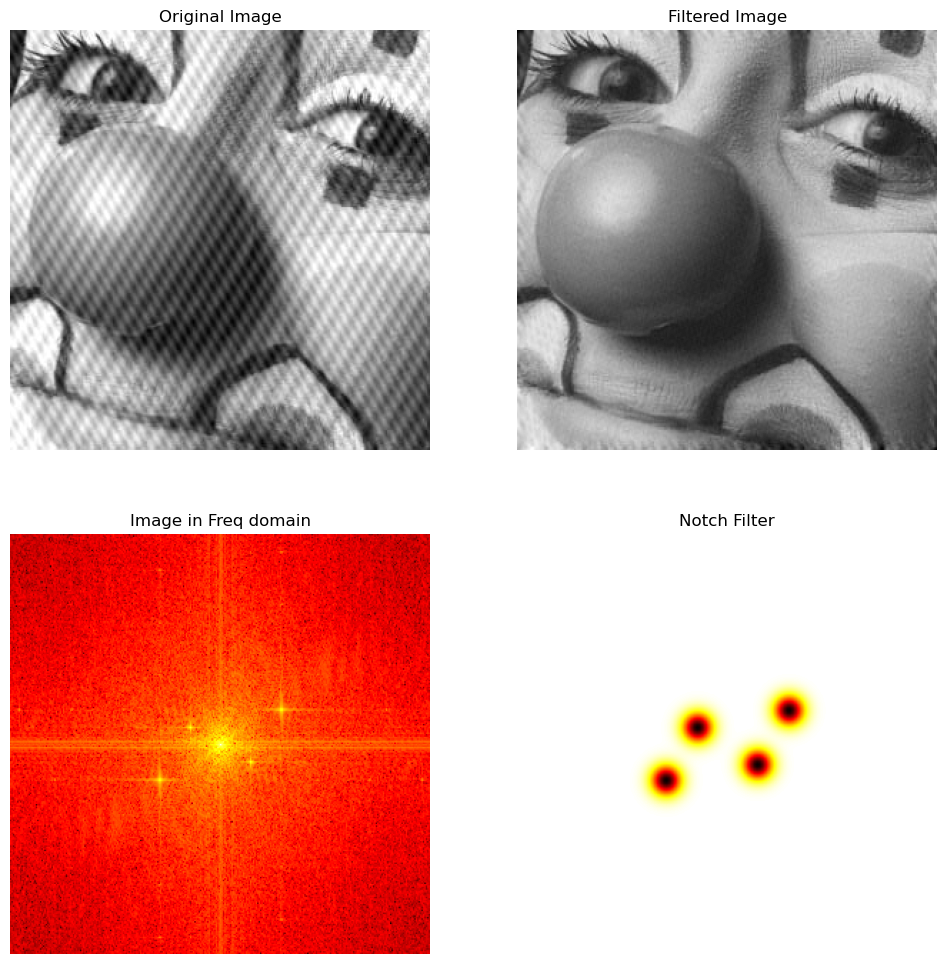

In [13]:
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))


plt.figure(figsize = (12,12))


plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(img, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Filtered Image')
plt.imshow(g, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title('Image in Freq domain')
plt.imshow(np.log1p(np.abs(Fshift)), cmap = 'hot')
plt.axis('off')

plt.subplot(2,2,4)
plt.title('Notch Filter')
plt.imshow(np.log1p(H), cmap = 'hot')
plt.axis('off')

plt.show()